# CLASSIFICAÇÃO

## DEVEMOS CONSTRUIR A NOSSA BASE

## 1 - MÉTRICAS

In [15]:
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def acuracia(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {accuracy}")
    
def erro(y_test, y_pred):
    error = 1 - accuracy_score(y_test, y_pred)
    print(f"Erro: {error}")
    
def recall(y_test, y_pred):
    sensibilidade = recall_score(y_test, y_pred)
    print(f"Recall: {sensibilidade}")
    return sensibilidade
    
def especificidade(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    print(f"Specificity: {specificity}")
    
def precisao(y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    print(f"Precisao: {precision}")
    return precision
    
def f1_score(y_test, y_pred):
    numerador = 2 * precisao(y_test, y_pred) * recall(y_test, y_pred)
    denominador = precisao(y_test, y_pred) + recall(y_test, y_pred)
    f1 = numerador / denominador
    print(f"F1 Score: {f1}")
    
def auc(y_test, y_pred_prob):
    area = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC: {area}")
    
def auc_roc(y_test, y_pred_prob):
    area = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % area)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def matriz(y, y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix')
    plt.show()

def mar(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    miss_alarm_rate = fn / (fn + tp)
    print(f"Miss Alarm Rate: {miss_alarm_rate}")

def far(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    false_alarm_rate = fp / (fp + tn)
    print(f"False Alarm Rate: {false_alarm_rate}")
    
def ks(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    ks_statics = max(tpr - fpr)
    print(f"KS: {ks_statics}")
    
def metricas(classes, y_test, y_pred, prob):
    acuracia(y_test, y_pred)
    erro(y_test, y_pred)
    recall(y_test, y_pred)
    especificidade(y_test, y_pred)
    precisao(y_test, y_pred)
    f1_score(y_test, y_pred)
    auc(y_test, prob)
    auc_roc(y_test, prob)
    matriz(classes, y_test, y_pred)
    mar(y_test, y_pred)
    far(y_test, y_pred)
    ks(y_test, prob)

## 2 - TRATAR OS DADOS

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("./dataset/cs-training.csv", index_col=False)

df.fillna(0, inplace=True)

colunas = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

x = df[colunas]
y = df["SeriousDlqin2yrs"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

## 3 - KNN

Acurácia: 0.9313777777777777
Erro: 0.06862222222222225
Recall: 0.021753460777851022
Specificity: 0.9971405423438021
Precisao: 0.3548387096774194
Precisao: 0.3548387096774194
Recall: 0.021753460777851022
Precisao: 0.3548387096774194
Recall: 0.021753460777851022
F1 Score: 0.040993788819875775
AUC: 0.574366629500838


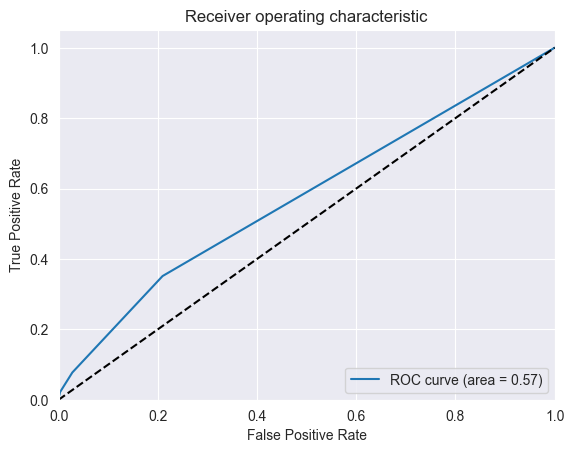

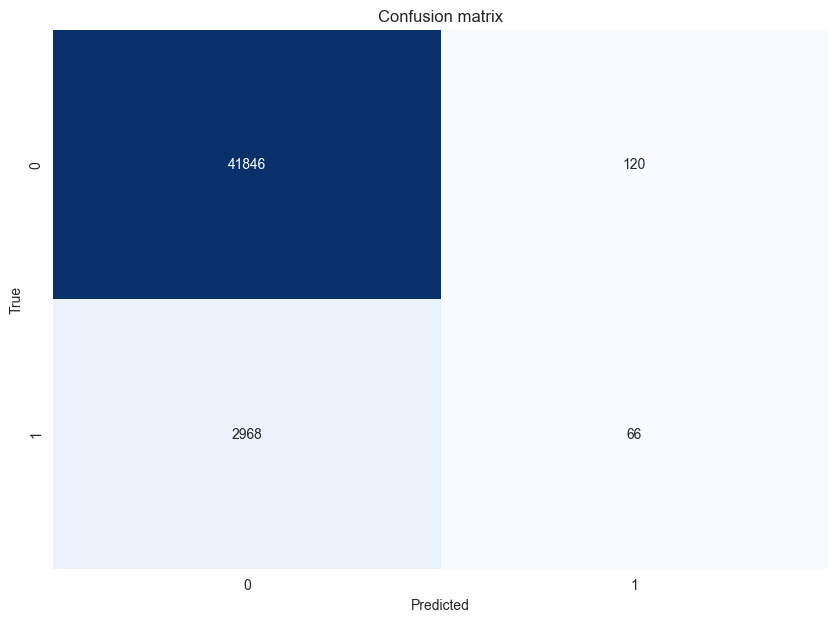

Miss Alarm Rate: 0.978246539222149
False Alarm Rate: 0.0028594576561978744
KS: 0.14182459159345212


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_treino, y_treino)

previsto = knn.predict(x_teste)
previsto_prob = knn.predict_proba(x_teste)[:, 1]

metricas(y, y_teste, previsto, previsto_prob)

## 4 - REDES NEURAIS

Iteration 1, loss = 0.25007678
Iteration 2, loss = 0.24398815
Iteration 3, loss = 0.24536309
Iteration 4, loss = 0.24487517
Iteration 5, loss = 0.24399462
Iteration 6, loss = 0.24357042
Iteration 7, loss = 0.24350758
Iteration 8, loss = 0.24306286
Iteration 9, loss = 0.24241224
Iteration 10, loss = 0.24239350
Iteration 11, loss = 0.24249056
Iteration 12, loss = 0.24265996
Iteration 13, loss = 0.24233108
Iteration 14, loss = 0.24215846
Iteration 15, loss = 0.24236672
Iteration 16, loss = 0.24209682
Iteration 17, loss = 0.24259009
Iteration 18, loss = 0.24211508
Iteration 19, loss = 0.24240003
Iteration 20, loss = 0.24192552
Iteration 21, loss = 0.24239016
Iteration 22, loss = 0.24268633
Iteration 23, loss = 0.24218591
Iteration 24, loss = 0.24200661
Iteration 25, loss = 0.24177438
Iteration 26, loss = 0.24179022
Iteration 27, loss = 0.24183308
Iteration 28, loss = 0.24205164
Iteration 29, loss = 0.24169320
Iteration 30, loss = 0.24191257
Iteration 31, loss = 0.24195378
Iteration 32, los

C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\AppD

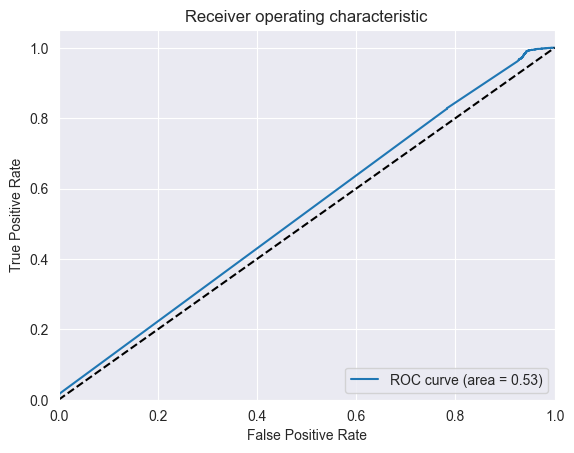

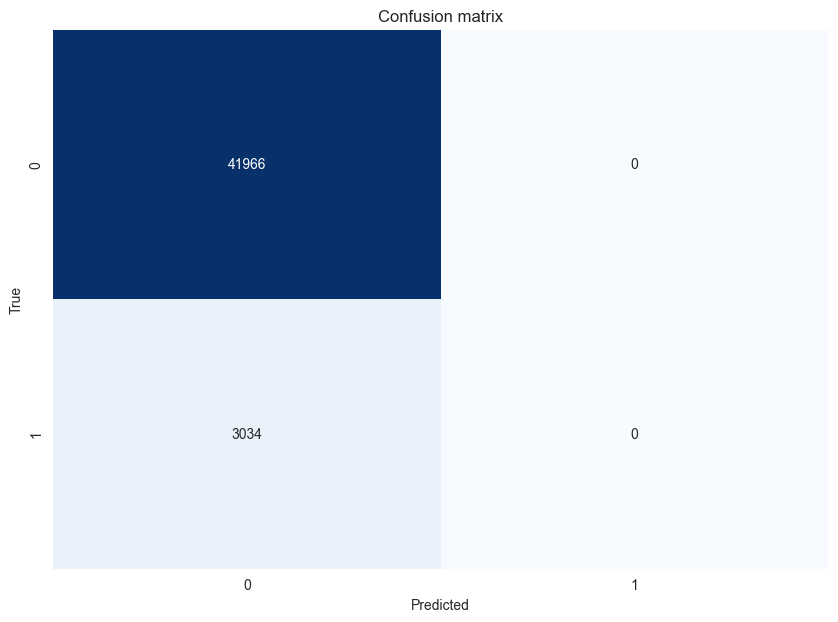

Miss Alarm Rate: 1.0
False Alarm Rate: 0.0
KS: 0.046772977000466676


In [18]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver="adam", alpha=0.0001, hidden_layer_sizes=(5, ), random_state=1, learning_rate='constant', learning_rate_init=0.01, max_iter=50, activation="logistic", tol=0.0001, verbose=True)

mlp.fit(x_treino, y_treino)
previsto = mlp.predict(x_teste)
previsto_prob = mlp.predict_proba(x_teste)[:, 1]

metricas(y, y_teste, previsto, previsto_prob)

# 5 - SVM

Acurácia: 0.9325777777777777
Erro: 0.06742222222222227
Recall: 0.0
Specificity: 1.0
Precisao: 0.0
Precisao: 0.0
Recall: 0.0
Precisao: 0.0
Recall: 0.0
F1 Score: nan
AUC: 0.574912925084754


C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gggui\AppD

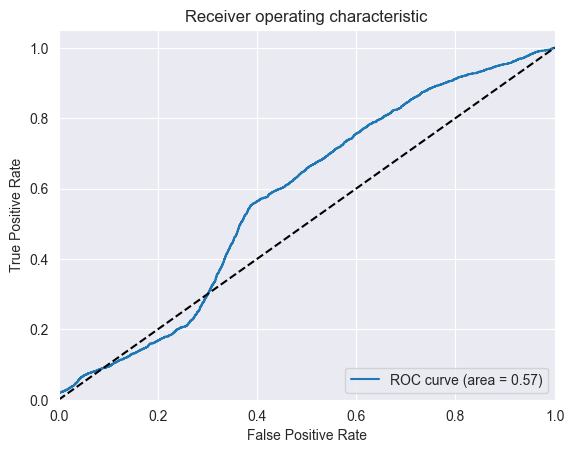

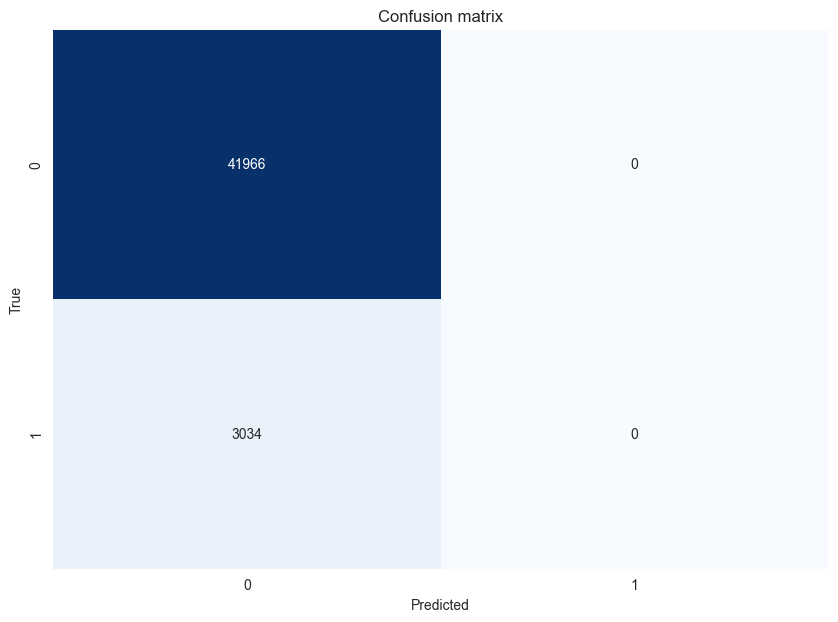

Miss Alarm Rate: 1.0
False Alarm Rate: 0.0
KS: 0.1650961221676423


In [23]:
from sklearn.svm import SVC

svm = SVC(probability=True)

svm.fit(x_treino, y_treino)
previsto = svm.predict(x_teste)
previsto_prob = svm.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

# 6 - DECISION TREE

Acurácia: 0.8956888888888889
Erro: 0.10431111111111113
Recall: 0.27158866183256425
Specificity: 0.940809226516704
Precisao: 0.24909310761789602
Precisao: 0.24909310761789602
Recall: 0.27158866183256425
Precisao: 0.24909310761789602
Recall: 0.27158866183256425
F1 Score: 0.2598549353516241
AUC: 0.6068515308764093


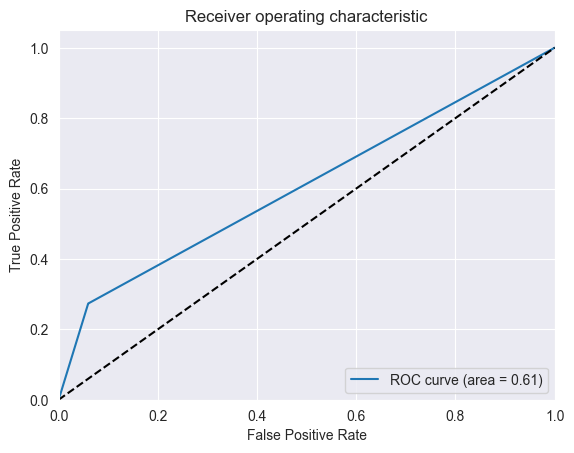

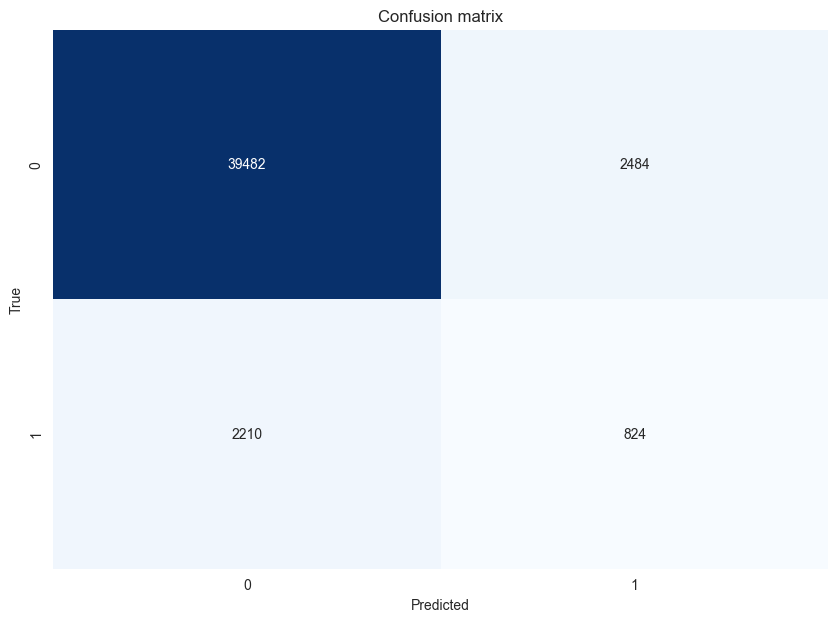

Miss Alarm Rate: 0.7284113381674358
False Alarm Rate: 0.059190773483296
KS: 0.21361295365105648


In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(x_treino, y_treino)
previsto = tree.predict(x_teste)
previsto_prob = tree.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

## 7 - RANDOM FLOREST

Acurácia: 0.9348222222222222
Erro: 0.06517777777777778
Recall: 0.09063941990771258
Specificity: 0.9958537863985131
Precisao: 0.6124721603563474
Precisao: 0.6124721603563474
Recall: 0.09063941990771258
Precisao: 0.6124721603563474
Recall: 0.09063941990771258
F1 Score: 0.15790984783232845
AUC: 0.8540334477064037


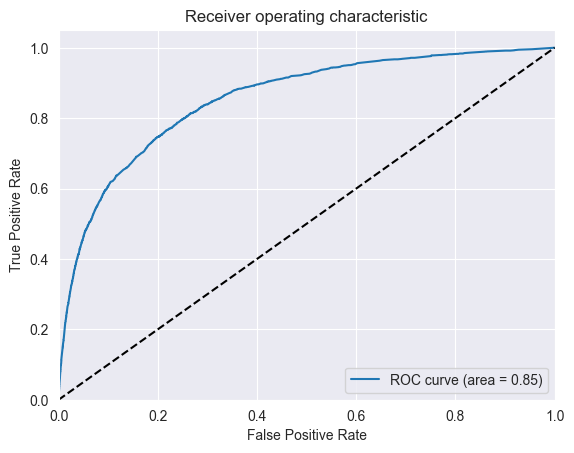

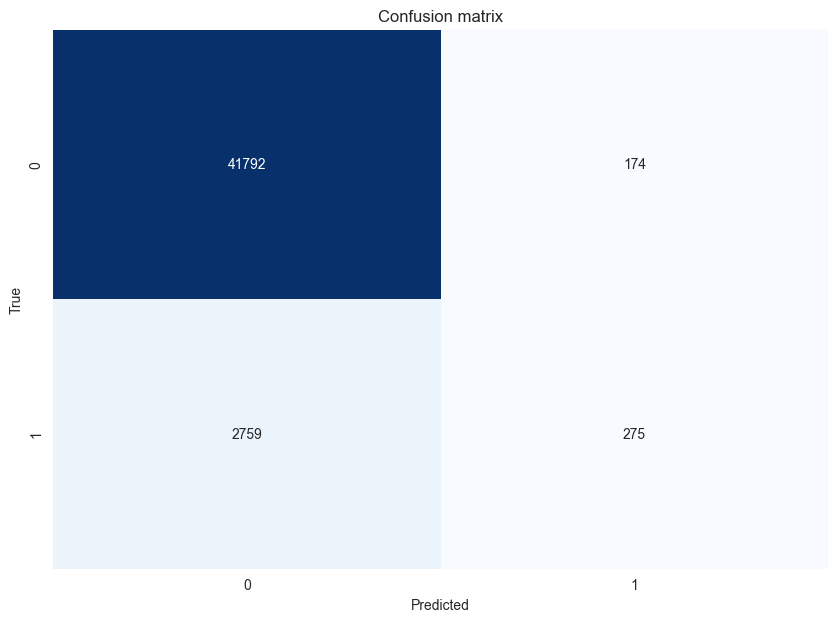

Miss Alarm Rate: 0.9093605800922874
False Alarm Rate: 0.004146213601486918
KS: 0.548416615377907


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=1)

rf.fit(x_treino, y_treino)
previsto = rf.predict(x_teste)
previsto_prob = rf.predict_proba(x_teste)[:, 1]

metricas(y, y_teste, previsto, previsto_prob)

## 8 - GRADIENT BOOSTING

Acurácia: 0.9236444444444445
Erro: 0.07635555555555551
Recall: 0.34278180619644033
Specificity: 0.9656388504980222
Precisao: 0.41901692183722805
Precisao: 0.41901692183722805
Recall: 0.34278180619644033
Precisao: 0.41901692183722805
Recall: 0.34278180619644033
F1 Score: 0.3770848440899202
AUC: 0.6542103283472313


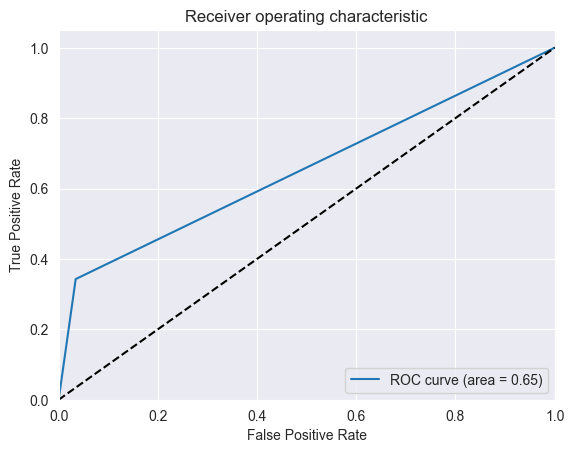

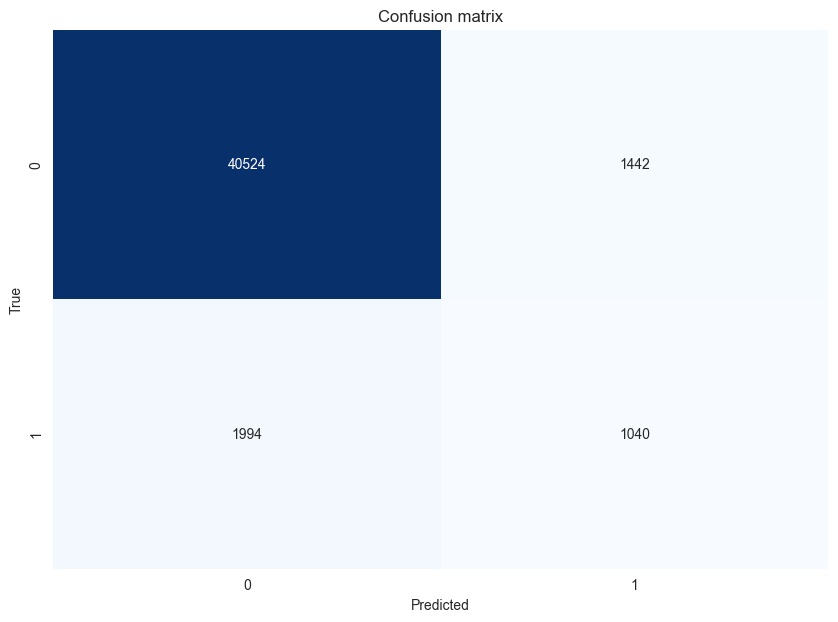

Miss Alarm Rate: 0.6572181938035596
False Alarm Rate: 0.03436114950197779
KS: 0.30842065669446256


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(x_treino, y_treino)
previsto = gb.predict(x_teste)
previsto_prob = gb.predict_proba(x_teste)[:, 1]

metricas(y, y_teste, previsto, previsto_prob)

## 9 - NAIVE BAYES

Acurácia: 0.9324
Erro: 0.0676
Recall: 0.02900461437046803
Specificity: 0.9977124338750417
Precisao: 0.4782608695652174
Precisao: 0.4782608695652174
Recall: 0.02900461437046803
Precisao: 0.4782608695652174
Recall: 0.02900461437046803
F1 Score: 0.054692355500310756
AUC: 0.7030821376855564


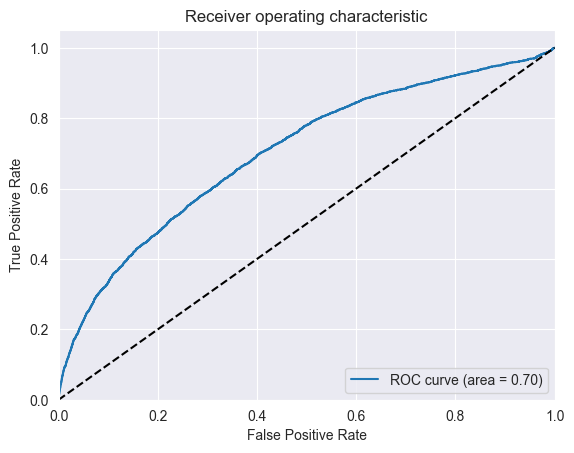

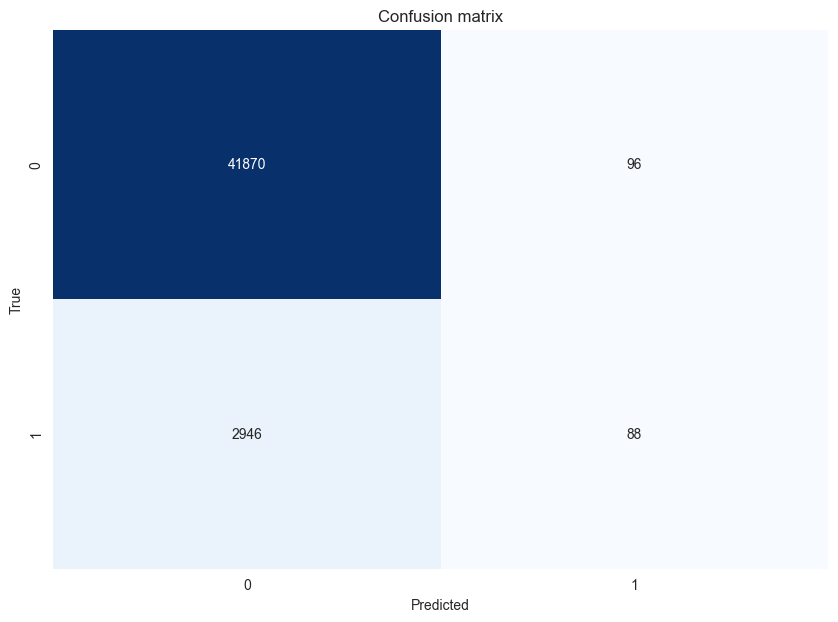

Miss Alarm Rate: 0.970995385629532
False Alarm Rate: 0.0022875661249582998
KS: 0.2950555823967866


In [26]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_treino, y_treino)
previsto = nb.predict(x_teste)
previsto_prob = nb.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

## 10 - PROCESSO GAUSSIANO

In [28]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

gp = GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True)
gp.fit(x_treino, y_treino)
previsto = gp.predict(x_teste)
previsto_prob = gp.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

MemoryError: Unable to allocate 82.1 GiB for an array with shape (105000, 105000) and data type float64

## 11 - ADABOOST

C:\Users\gggui\PycharmProjects\ml1\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acurácia: 0.9345333333333333
Erro: 0.06546666666666667
Recall: 0.2023731048121292
Specificity: 0.9874660439403327
Precisao: 0.5385964912280702
Precisao: 0.5385964912280702
Recall: 0.2023731048121292
Precisao: 0.5385964912280702
Recall: 0.2023731048121292
F1 Score: 0.29420220412074743
AUC: 0.85956177177802


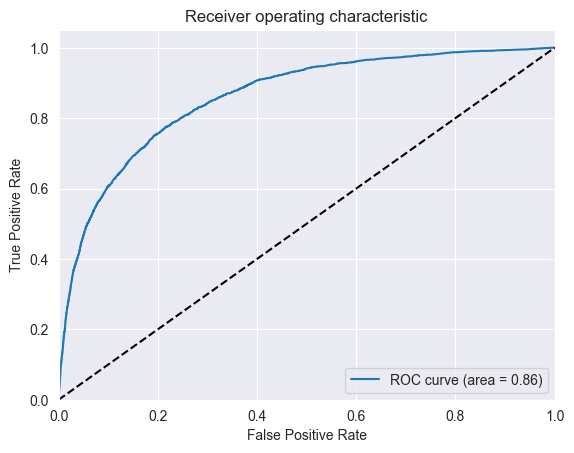

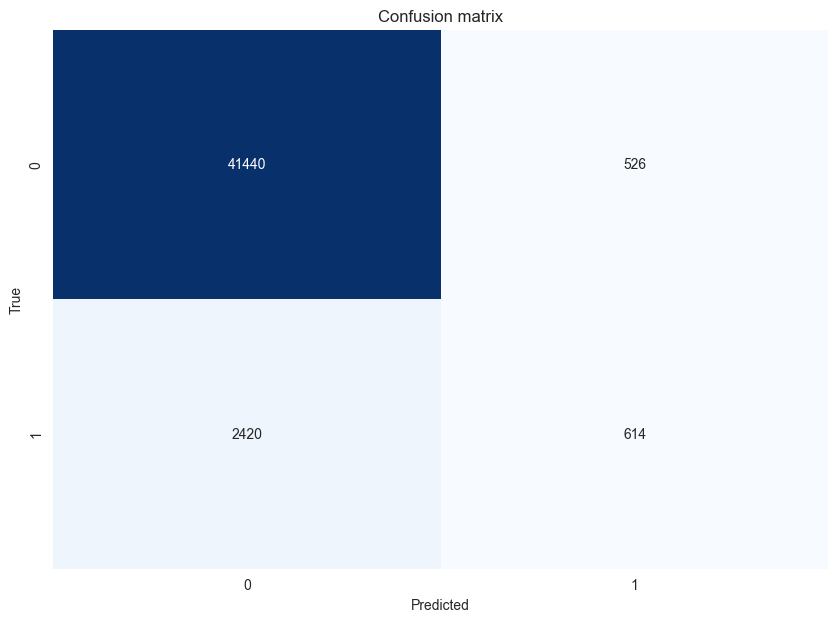

Miss Alarm Rate: 0.7976268951878708
False Alarm Rate: 0.01253395605966735
KS: 0.5589877808921564


In [29]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab.fit(x_treino, y_treino)
previsto = ab.predict(x_teste)
previsto_prob = ab.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)

## 12 - QUADRATIC DISCRIMINANT ANALYSIS

Acurácia: 0.9052666666666667
Erro: 0.09473333333333334
Recall: 0.43441001977587346
Specificity: 0.9393080112472001
Precisao: 0.3410090556274256
Precisao: 0.3410090556274256
Recall: 0.43441001977587346
Precisao: 0.3410090556274256
Recall: 0.43441001977587346
F1 Score: 0.3820843600521815
AUC: 0.7989241793219868


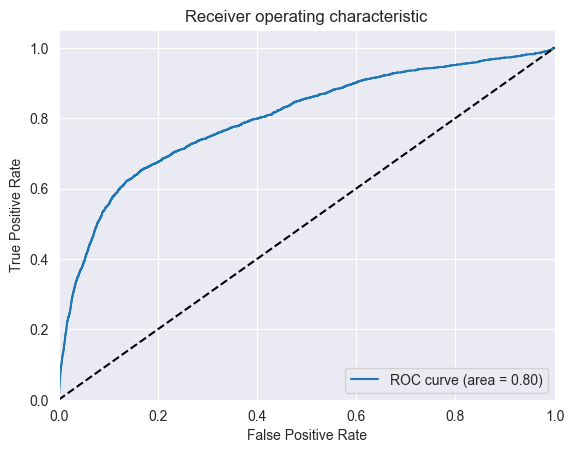

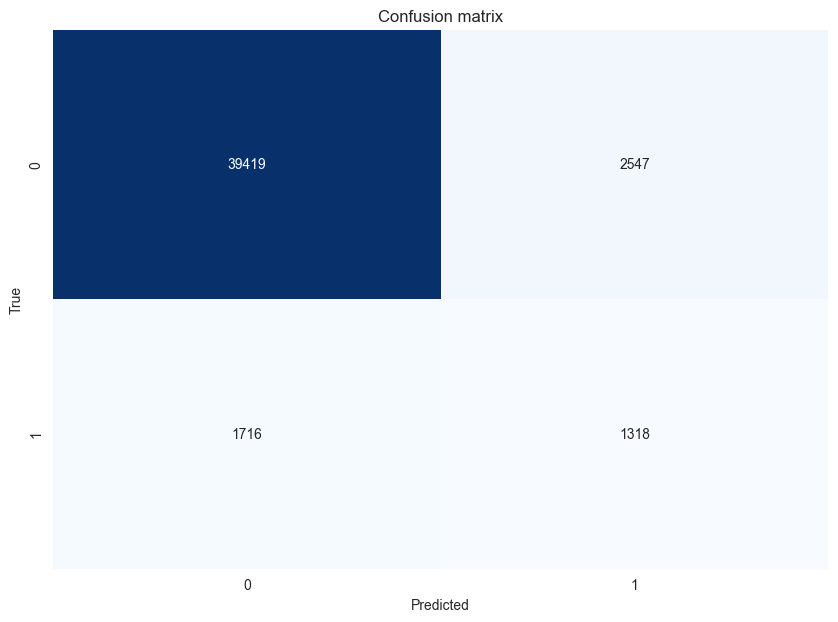

Miss Alarm Rate: 0.5655899802241265
False Alarm Rate: 0.06069198875279989
KS: 0.48558766739977316


In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_treino, y_treino)
previsto = qda.predict(x_teste)
previsto_prob = qda.predict_proba(x_teste)[:,1]

metricas(y, y_teste, previsto, previsto_prob)